# **Load toàn bộ dữ liệu**

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Chuẩn hóa dữ liệu
train_datagen = ImageDataGenerator(rescale=1.0/255.0)
test_datagen = ImageDataGenerator(rescale=1.0/255.0)

train_generator = train_datagen.flow_from_directory(
    'dataset/train',
    target_size=(32, 32),
    batch_size=32,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    'dataset/test',
    target_size=(32, 32),
    batch_size=32,
    class_mode='binary'
)


Found 571 images belonging to 1 classes.
Found 143 images belonging to 1 classes.


#Xây dựng mô hình CNN
**Mô hình ShallowNet**

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D(pool_size=(2,2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Dùng sigmoid vì chỉ có 1 lớp (mèo)
])

# Compile mô hình
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 7200)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         921,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 922,753 (3.52 MB)

 Trainable params: 922,753 (3.52 MB)

 Non-trainable params: 0 (0.00 B)

# **Train mô hình trên tập train**

In [12]:
history = model.fit(
    train_generator,
    validation_data=test_generator,
    epochs=20
)


Epoch 1/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 85ms/step - accuracy: 1.0000 - loss: 1.0847e-09 - val_accuracy: 1.0000 - val_loss: 3.5075e-10
Epoch 2/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step - accuracy: 1.0000 - loss: 3.6885e-10 - val_accuracy: 1.0000 - val_loss: 3.5070e-10
Epoch 3/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 122ms/step - accuracy: 1.0000 - loss: 1.5727e-09 - val_accuracy: 1.0000 - val_loss: 3.5064e-10
Epoch 4/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - accuracy: 1.0000 - loss: 3.0910e-10 - val_accuracy: 1.0000 - val_loss: 3.5058e-10
Epoch 5/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - accuracy: 1.0000 - loss: 4.7341e-10 - val_accuracy: 1.0000 - val_loss: 3.5051e-10
Epoch 6/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 76ms/step - accuracy: 1.0000 - loss: 5.9850e-10 - val_accuracy: 1.0000 - val_loss: 3.5044e-10
Epoch 7/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - accuracy: 1.0000 - loss: 3.9096e-09 - val_accuracy: 1.0000 - val_loss: 3.5023e-10
Epoch 8/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 75ms/step - a

# **Kiểm tra, đánh giá mô hình**

In [13]:
test_loss, test_acc = model.evaluate(test_generator)
print(f"Độ chính xác trên tập test: {test_acc*100:.2f}%")


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 1.0000 - loss: 5.7948e-10
Độ chính xác trên tập test: 100.00%


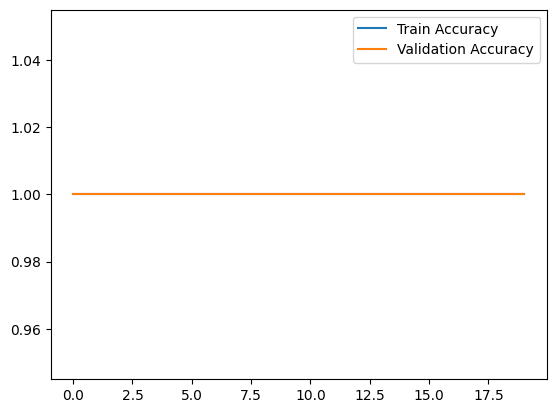

In [16]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()


# **dự đoán ảnh bất kỳ**

In [18]:
import numpy as np
from tensorflow.keras.preprocessing import image

def predict_image(img_path, model):
    img = image.load_img(img_path, target_size=(32, 32))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    prediction = model.predict(img_array)
    class_index = np.argmax(prediction)

    labels = list(train_generator.class_indices.keys())  # Lấy tên class
    print(f"Dự đoán: {labels[class_index]}")

# Kiểm tra với một ảnh
predict_image('/content/dataset/test/cats/cats_00001.jpg', model)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
Dự đoán: cats
